# Automobile Prediction

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from plotnine import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image
import png

## Exploratory Data Analysis

In [12]:
cars = pd.read_csv("cars.csv")
cars.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19     3.4              10.0        102      5500       24   
4         mpfi  3.19     3.4               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

**Some columns are filled with a "?" to represent null values.**

In [13]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

**Numeric type columns are cast as objects due to inclusion of "?".**

**Convert all "?" to null and change numeric columns to type float.**

In [14]:
cars.replace({'?': np.nan}, inplace=True)
cols = [1,18,19,21,22,25]
for i in cols:
    cars.iloc[:,i] = cars.iloc[:,i].astype(float)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-

**Fill NA with average of the column.**

In [15]:
for i in cols:
    avg = cars.iloc[:,i].mean()
    cars.iloc[:,i].fillna(avg,inplace=True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-

**Drop any remaining null values from the table (makes data slightly cleaner).**

In [16]:
cars = cars.dropna()
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 26 columns):
symboling            203 non-null int64
normalized-losses    203 non-null float64
make                 203 non-null object
fuel-type            203 non-null object
aspiration           203 non-null object
num-of-doors         203 non-null object
body-style           203 non-null object
drive-wheels         203 non-null object
engine-location      203 non-null object
wheel-base           203 non-null float64
length               203 non-null float64
width                203 non-null float64
height               203 non-null float64
curb-weight          203 non-null int64
engine-type          203 non-null object
num-of-cylinders     203 non-null object
engine-size          203 non-null int64
fuel-system          203 non-null object
bore                 203 non-null float64
stroke               203 non-null float64
compression-ratio    203 non-null float64
horsepower           203 non-

**Remove outliers from car data set using z-scores (z-scores of 3 or more are considered unusual). Only applies to numeric type data.**

In [17]:
num_cols = [0,1,9,10,11,12,13,16,18,19,20,21,22,23,24,25]
z_scores = stats.zscore(cars.iloc[:,num_cols])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
filtered_cars = cars[filtered_entries]
filtered_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 204
Data columns (total 26 columns):
symboling            176 non-null int64
normalized-losses    176 non-null float64
make                 176 non-null object
fuel-type            176 non-null object
aspiration           176 non-null object
num-of-doors         176 non-null object
body-style           176 non-null object
drive-wheels         176 non-null object
engine-location      176 non-null object
wheel-base           176 non-null float64
length               176 non-null float64
width                176 non-null float64
height               176 non-null float64
curb-weight          176 non-null int64
engine-type          176 non-null object
num-of-cylinders     176 non-null object
engine-size          176 non-null int64
fuel-system          176 non-null object
bore                 176 non-null float64
stroke               176 non-null float64
compression-ratio    176 non-null float64
horsepower           176 non-

In [18]:
filtered_cars.describe()

symboling  normalized-losses  wheel-base      length       width  \
count  176.000000         176.000000  176.000000  176.000000  176.000000   
mean     0.835227         120.471591   98.447727  173.501705   65.779545   
std      1.265411          30.145538    5.518312   11.555558    1.974909   
min     -2.000000          65.000000   86.600000  144.600000   61.800000   
25%      0.000000         100.250000   94.500000  166.300000   64.075000   
50%      1.000000         122.000000   96.500000  173.100000   65.400000   
75%      2.000000         134.750000  101.200000  180.600000   66.500000   
max      3.000000         197.000000  115.600000  202.600000   71.700000   

           height  curb-weight  engine-size        bore      stroke  \
count  176.000000   176.000000   176.000000  176.000000  176.000000   
mean    53.744886  2519.511364   122.931818    3.334199    3.258532   
std      2.466687   474.853276    31.975632    0.260471    0.280450   
min     48.800000  1819.000000    70.000000    2.680000    2.360000   
25%     52.000000  2126.500000    97.000000    3.150000    3.110000   
50%     54.100000  2410.000000   119.500000    3.319876    3.270000   
75%     55.500000  2910.500000   141.000000    3.582500    3.410000   
max     59.800000  3770.000000   234.000000    3.940000    3.900000   

       compression-ratio  horsepower     peak-rpm    city-mpg  highway-mpg  \
count         176.000000  176.000000   176.000000  176.000000   176.000000   
mean            9.487614  102.326775  5142.333744   24.948864    30.517045   
std             2.806490   33.116969   453.342315    5.569581     5.830927   
min             7.000000   60.000000  4150.000000   15.000000    18.000000   
25%             8.600000   70.000000  4800.000000   19.750000    25.000000   
50%             9.000000   95.000000  5200.000000   24.000000    30.000000   
75%             9.400000  116.000000  5500.000000   30.000000    34.000000   
max            21.500000  207.000000  6000.000000   38.000000    47.000000   

              price  
count    176.000000  
mean   12425.178341  
std     6533.010901  
min     5118.000000  
25%     7669.000000  
50%    10270.000000  
75%    15808.750000  
max    36880.000000

## PCA

**Use PCA to find best predicting columns in dataset and add to the dataset.**

In [19]:
features = filtered_cars.iloc[:,num_cols]
features = StandardScaler().fit_transform(features)
features = Normalizer().fit_transform(features)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(features)
filtered_cars["PC1"] = principalComponents[:,0]
filtered_cars["PC2"] = principalComponents[:,1]
filtered_cars["PC3"] = principalComponents[:,2]
PCN = filtered_cars[["PC1","PC2","PC3"]]
filtered_cars.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3              122.0  alfa-romero       gas        std   
1          3              122.0  alfa-romero       gas        std   
2          1              122.0  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   stroke  compression-ratio  horsepower  peak-rpm city-mpg highway-mpg  \
0    2.68                9.0       111.0    5000.0       21          27   
1    2.68                9.0       111.0    5000.0       21          27   
2    3.47                9.0       154.0    5000.0       19          26   
3    3.40               10.0       102.0    5500.0       24          30   
4    3.40                8.0       115.0    5500.0       18          22   

     price       PC1       PC2       PC3  
0  13495.0 -0.019736  0.502572  0.759413  
1  16500.0  0.012718  0.503496  0.756517  
2  16500.0  0.284235  0.413857 -0.294998  
3  13950.0  0.084619  0.596496 -0.282981  
4  17450.0  0.633991  0.605016 -0.181832  

[5 rows x 29 columns]

In [10]:
num_iter = 50

## Predicting Symboling (Risk Factor) of Car

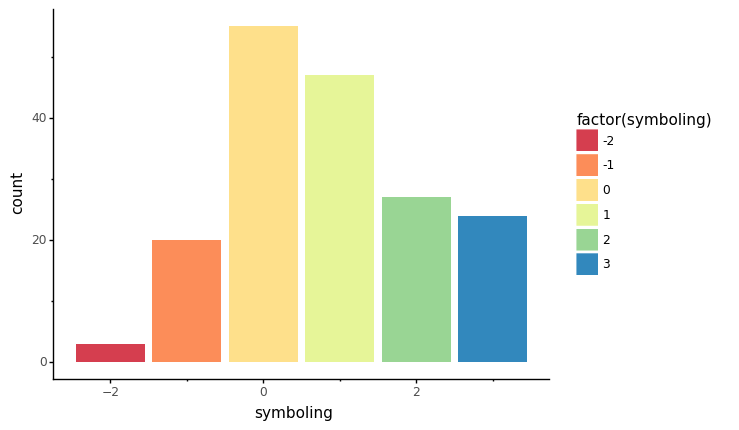

<ggplot: (303436009)>

In [11]:
symboling = ggplot(filtered_cars,aes(x='symboling',fill='factor(symboling)'))+geom_bar()+theme_classic()+scale_fill_brewer(type="div", palette="Spectral")
file_name = "symboling.png"
ggsave(plot = symboling, filename = file_name)
symboling

In [46]:
num_cols = [0,1,9,10,11,12,13,16,18,19,20,21,22,23,24,25]
num_cols.remove(0)
nums = filtered_cars.iloc[:,num_cols]

### Linear Regression

In [13]:
accuracy = 0
for i in range(num_iter):
    lm = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(nums, filtered_cars['symboling'], test_size=0.2)
    lm.fit(X_train,y_train)
    accuracy += cross_val_score(lm, nums, filtered_cars['symboling'], cv=5).mean()
print("Linear Regression (all numeric values) Accuracy: ", accuracy/num_iter)

Linear Regression (all numeric values) Accuracy:  0.33184945328909565


In [47]:
accuracy = 0
for i in range(num_iter):
    lm = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(PCN, filtered_cars['symboling'], test_size=0.2)
    lm.fit(X_train,y_train)
    accuracy += cross_val_score(lm, PCN, filtered_cars['symboling'], cv=5).mean()
print("Linear Regression (using PCA) Accuracy: ", accuracy/num_iter)

Linear Regression (using PCA) Accuracy:  0.6371291023613103


### Logistic Regression

Logistic Regression (using all values) Accuracy:  0.3926984126984127


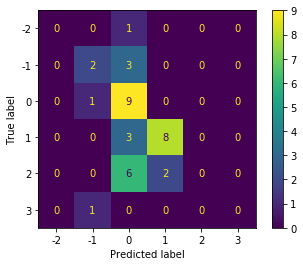

In [15]:
accuracy = 0
for i in range(num_iter):
    X_train, X_test, y_train, y_test = train_test_split(nums, filtered_cars['symboling'], test_size=0.2)
    logmodel = LogisticRegression()
    logmodel.fit(X_train, y_train)
    accuracy += cross_val_score(logmodel, nums, filtered_cars['symboling'], cv=5).mean()
print("Logistic Regression (using all values) Accuracy: ", accuracy/num_iter)
plot_confusion_matrix(logmodel,X_test,y_test)

Logistic Regression (using PCA) Accuracy:  0.5579365079365076


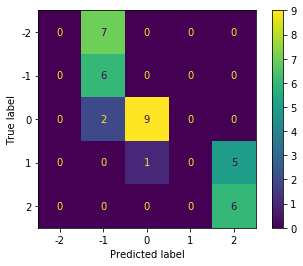

In [16]:
accuracy = 0
for i in range(num_iter):
    X_train, X_test, y_train, y_test = train_test_split(PCN, filtered_cars['symboling'], test_size=0.2)
    logmodel = LogisticRegression()
    logmodel.fit(X_train, y_train)
    accuracy += cross_val_score(logmodel, PCN, filtered_cars['symboling'], cv=5).mean()
print("Logistic Regression (using PCA) Accuracy: ", accuracy/num_iter)
plot_confusion_matrix(logmodel,X_test,y_test)

### k-Nearest Neighbors

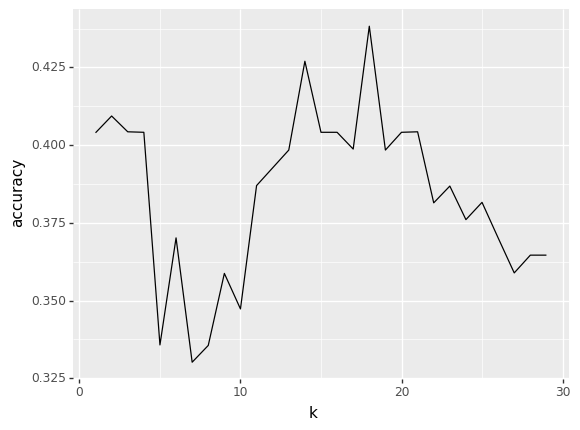

<ggplot: (280942657)>

In [17]:
accuracy = []
k = []
for i in range(1,30):
    neigh=KNeighborsClassifier(n_neighbors=i)
    X_train, X_test, y_train, y_test = train_test_split(nums, filtered_cars['symboling'], test_size=0.2)
    neigh.fit(X_train,y_train)
    k.append(i)
    accuracy.append(cross_val_score(neigh, nums, filtered_cars['symboling'], cv=5).mean())
df = pd.DataFrame({'k':k,'accuracy':accuracy})
ggplot(df,aes(x='k',y='accuracy'))+geom_line()

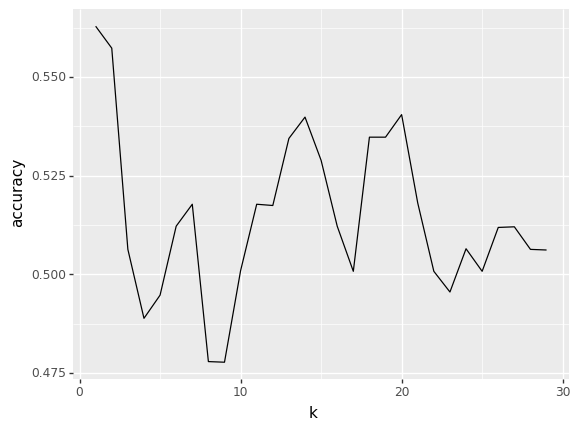

<ggplot: (308187761)>

In [18]:
accuracy = []
k = []
for i in range(1,30):
    neigh=KNeighborsClassifier(n_neighbors=i)
    X_train, X_test, y_train, y_test = train_test_split(PCN, filtered_cars['symboling'], test_size=0.2)
    neigh.fit(X_train,y_train)
    k.append(i)
    accuracy.append(cross_val_score(neigh, PCN, filtered_cars['symboling'], cv=5).mean())
df = pd.DataFrame({'k':k,'accuracy':accuracy})
symboling = ggplot(df,aes(x='k',y='accuracy'))+geom_line()
file_name = "symboling_kNN.png"
ggsave(plot = symboling, filename = file_name)
symboling

In [24]:
accuracy = 0
for i in range(num_iter):
    neigh=KNeighborsClassifier(n_neighbors=18)
    X_train, X_test, y_train, y_test = train_test_split(nums, filtered_cars['symboling'], test_size=0.2)
    neigh.fit(X_train,y_train)
    accuracy += cross_val_score(neigh, nums, filtered_cars['symboling'], cv=5).mean()
print("k-Nearest Neighbors (using all values) Accuracy: ", accuracy/num_iter)

k-Nearest Neighbors (using PCA) Accuracy:  0.43825396825396823


In [155]:
accuracy = 0
for i in range(num_iter):
    neigh=KNeighborsClassifier(n_neighbors=1)
    X_train, X_test, y_train, y_test = train_test_split(PCN, filtered_cars['symboling'], test_size=0.2)
    neigh.fit(X_train,y_train)
    accuracy += cross_val_score(neigh, PCN, filtered_cars['symboling'], cv=5).mean()
print("k-Nearest Neighbors (using PCA) Accuracy: ", accuracy/num_iter)

k-Nearest Neighbors (using PCA) Accuracy:  0.5628571428571433


### Summary for Predicting Symboling

Best accuracies of each algorithm:

**Linear Regression:** 0.637

**Logistic Regression:** 0.558

**k-Nearest Neighbors:** 0.562

Linear Regression performed the best out of all the algorithms.

## Predicting Riskiness of a Car

### Binary Classification

In [25]:
def num2cat(value):
    if 0 >= value:
        return 'Safe'
    else:
        return 'Risky'

filtered_cars['riskiness'] = filtered_cars['symboling'].apply(num2cat)

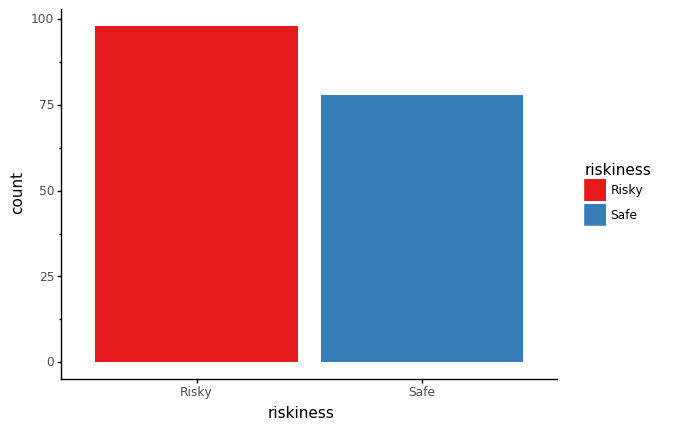

<ggplot: (308432201)>

In [26]:
riskiness = ggplot(filtered_cars,aes(x='riskiness',fill='riskiness'))+geom_bar()+theme_classic()+scale_fill_brewer(type="qual", palette="Set1")
file_name = "riskiness.png"
ggsave(plot = riskiness, filename = file_name)
riskiness

In [43]:
num_cols = [0,1,9,10,11,12,13,16,18,19,20,21,22,23,24,25]
num_cols.remove(0)
nums = filtered_cars.iloc[:,num_cols]

### Logistic Regression

Logistic Regression (using all values) Accuracy:  0.6941269841269846


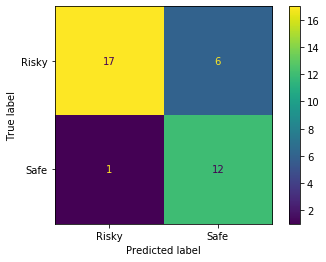

In [44]:
accuracy = 0
for i in range(num_iter):
    X_train, X_test, y_train, y_test = train_test_split(nums, filtered_cars['riskiness'], test_size=0.2)
    logmodel = LogisticRegression()
    logmodel.fit(X_train, y_train)
    accuracy += cross_val_score(logmodel, nums, filtered_cars['riskiness'], cv=5).mean()
print("Logistic Regression (using all values) Accuracy: ", accuracy/num_iter)
plot_confusion_matrix(logmodel,X_test,y_test)

Logistic Regression (using PCA) Accuracy:  0.7912698412698418


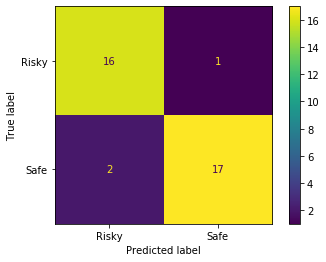

In [29]:
accuracy = 0
for i in range(num_iter):
    X_train, X_test, y_train, y_test = train_test_split(PCN, filtered_cars['riskiness'], test_size=0.2)
    logmodel = LogisticRegression()
    logmodel.fit(X_train, y_train)
    accuracy += cross_val_score(logmodel, PCN, filtered_cars['riskiness'], cv=5).mean()
print("Logistic Regression (using PCA) Accuracy: ", accuracy/num_iter)
plot_confusion_matrix(logmodel,X_test,y_test)

### k-Nearest Neighbors

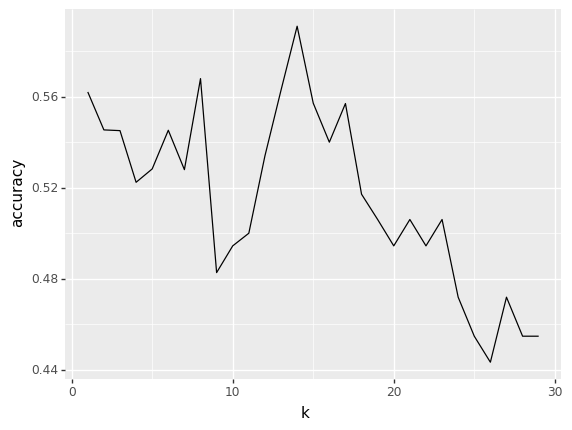

<ggplot: (303198305)>

In [25]:
accuracy = []
k = []
for i in range(1,30):
    neigh=KNeighborsClassifier(n_neighbors=i)
    X_train, X_test, y_train, y_test = train_test_split(nums, filtered_cars['riskiness'], test_size=0.2)
    neigh.fit(X_train,y_train)
    k.append(i)
    accuracy.append(cross_val_score(neigh, nums, filtered_cars['riskiness'], cv=5).mean())
df = pd.DataFrame({'k':k,'accuracy':accuracy})
ggplot(df,aes(x='k',y='accuracy'))+geom_line()

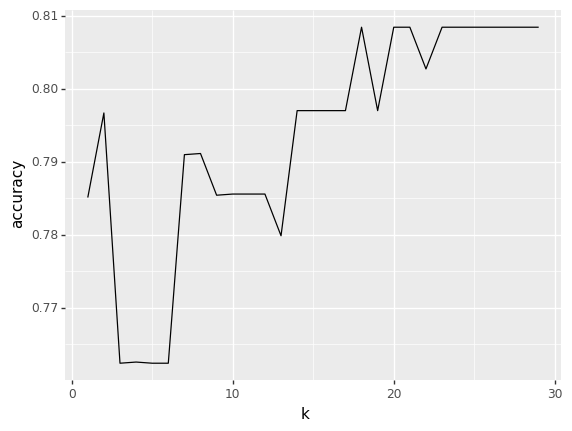

<ggplot: (303369377)>

In [31]:
accuracy = []
k = []
for i in range(1,30):
    neigh=KNeighborsClassifier(n_neighbors=i)
    X_train, X_test, y_train, y_test = train_test_split(PCN, filtered_cars['riskiness'], test_size=0.2)
    neigh.fit(X_train,y_train)
    k.append(i)
    accuracy.append(cross_val_score(neigh, PCN, filtered_cars['riskiness'], cv=5).mean())
df = pd.DataFrame({'k':k,'accuracy':accuracy})
riskiness = ggplot(df,aes(x='k',y='accuracy'))+geom_line()
file_name = "riskiness_kNN.png"
ggsave(plot = riskiness, filename = file_name)
riskiness

In [31]:
accuracy = 0
for i in range(num_iter):
    neigh=KNeighborsClassifier(n_neighbors=14)
    X_train, X_test, y_train, y_test = train_test_split(nums, filtered_cars['riskiness'], test_size=0.2)
    neigh.fit(X_train,y_train)
    accuracy += cross_val_score(neigh, nums, filtered_cars['riskiness'], cv=5).mean()
print("k-Nearest Neighbors (using all values) Accuracy: ", accuracy/num_iter)

k-Nearest Neighbors (using PCA) Accuracy:  0.5909523809523806


In [28]:
accuracy = 0
for i in range(num_iter):
    neigh=KNeighborsClassifier(n_neighbors=20)
    X_train, X_test, y_train, y_test = train_test_split(PCN, filtered_cars['riskiness'], test_size=0.2)
    neigh.fit(X_train,y_train)
    accuracy += cross_val_score(neigh, PCN, filtered_cars['riskiness'], cv=5).mean()
print("k-Nearest Neighbors (using PCA) Accuracy: ", accuracy/num_iter)

k-Nearest Neighbors (using PCA) Accuracy:  0.808412698412698


### Decision Tree

In [164]:
accuracy = 0
for i in range(num_iter):
    X_train,X_test,Y_train,Y_test = train_test_split(nums, filtered_cars['riskiness'],test_size=0.2)
    clf = DecisionTreeClassifier()
    clf.fit(X_train,Y_train)
    accuracy += cross_val_score(clf, nums, filtered_cars['riskiness'], cv=5).mean()
print("Logistic Regression (using all values) Accuracy: ", accuracy/num_iter)

Accuracy:  0.6157174603174603


In [165]:
accuracy = 0
for i in range(num_iter):
    X_train,X_test,Y_train,Y_test = train_test_split(PCN, filtered_cars['riskiness'],test_size=0.2)
    clf = DecisionTreeClassifier()
    clf.fit(X_train,Y_train)
    accuracy += cross_val_score(clf, PCN, filtered_cars['riskiness'], cv=5).mean()
print("Logistic Regression (using PCA) Accuracy: ", accuracy/num_iter)

Accuracy:  0.7503714285714287


In [166]:
export_graphviz(
    clf,
    out_file = "riskiness_DT.dot",
    feature_names = PCN.columns,
    class_names = ["Risky","Safe"],
    filled = True,
    rounded = True
)

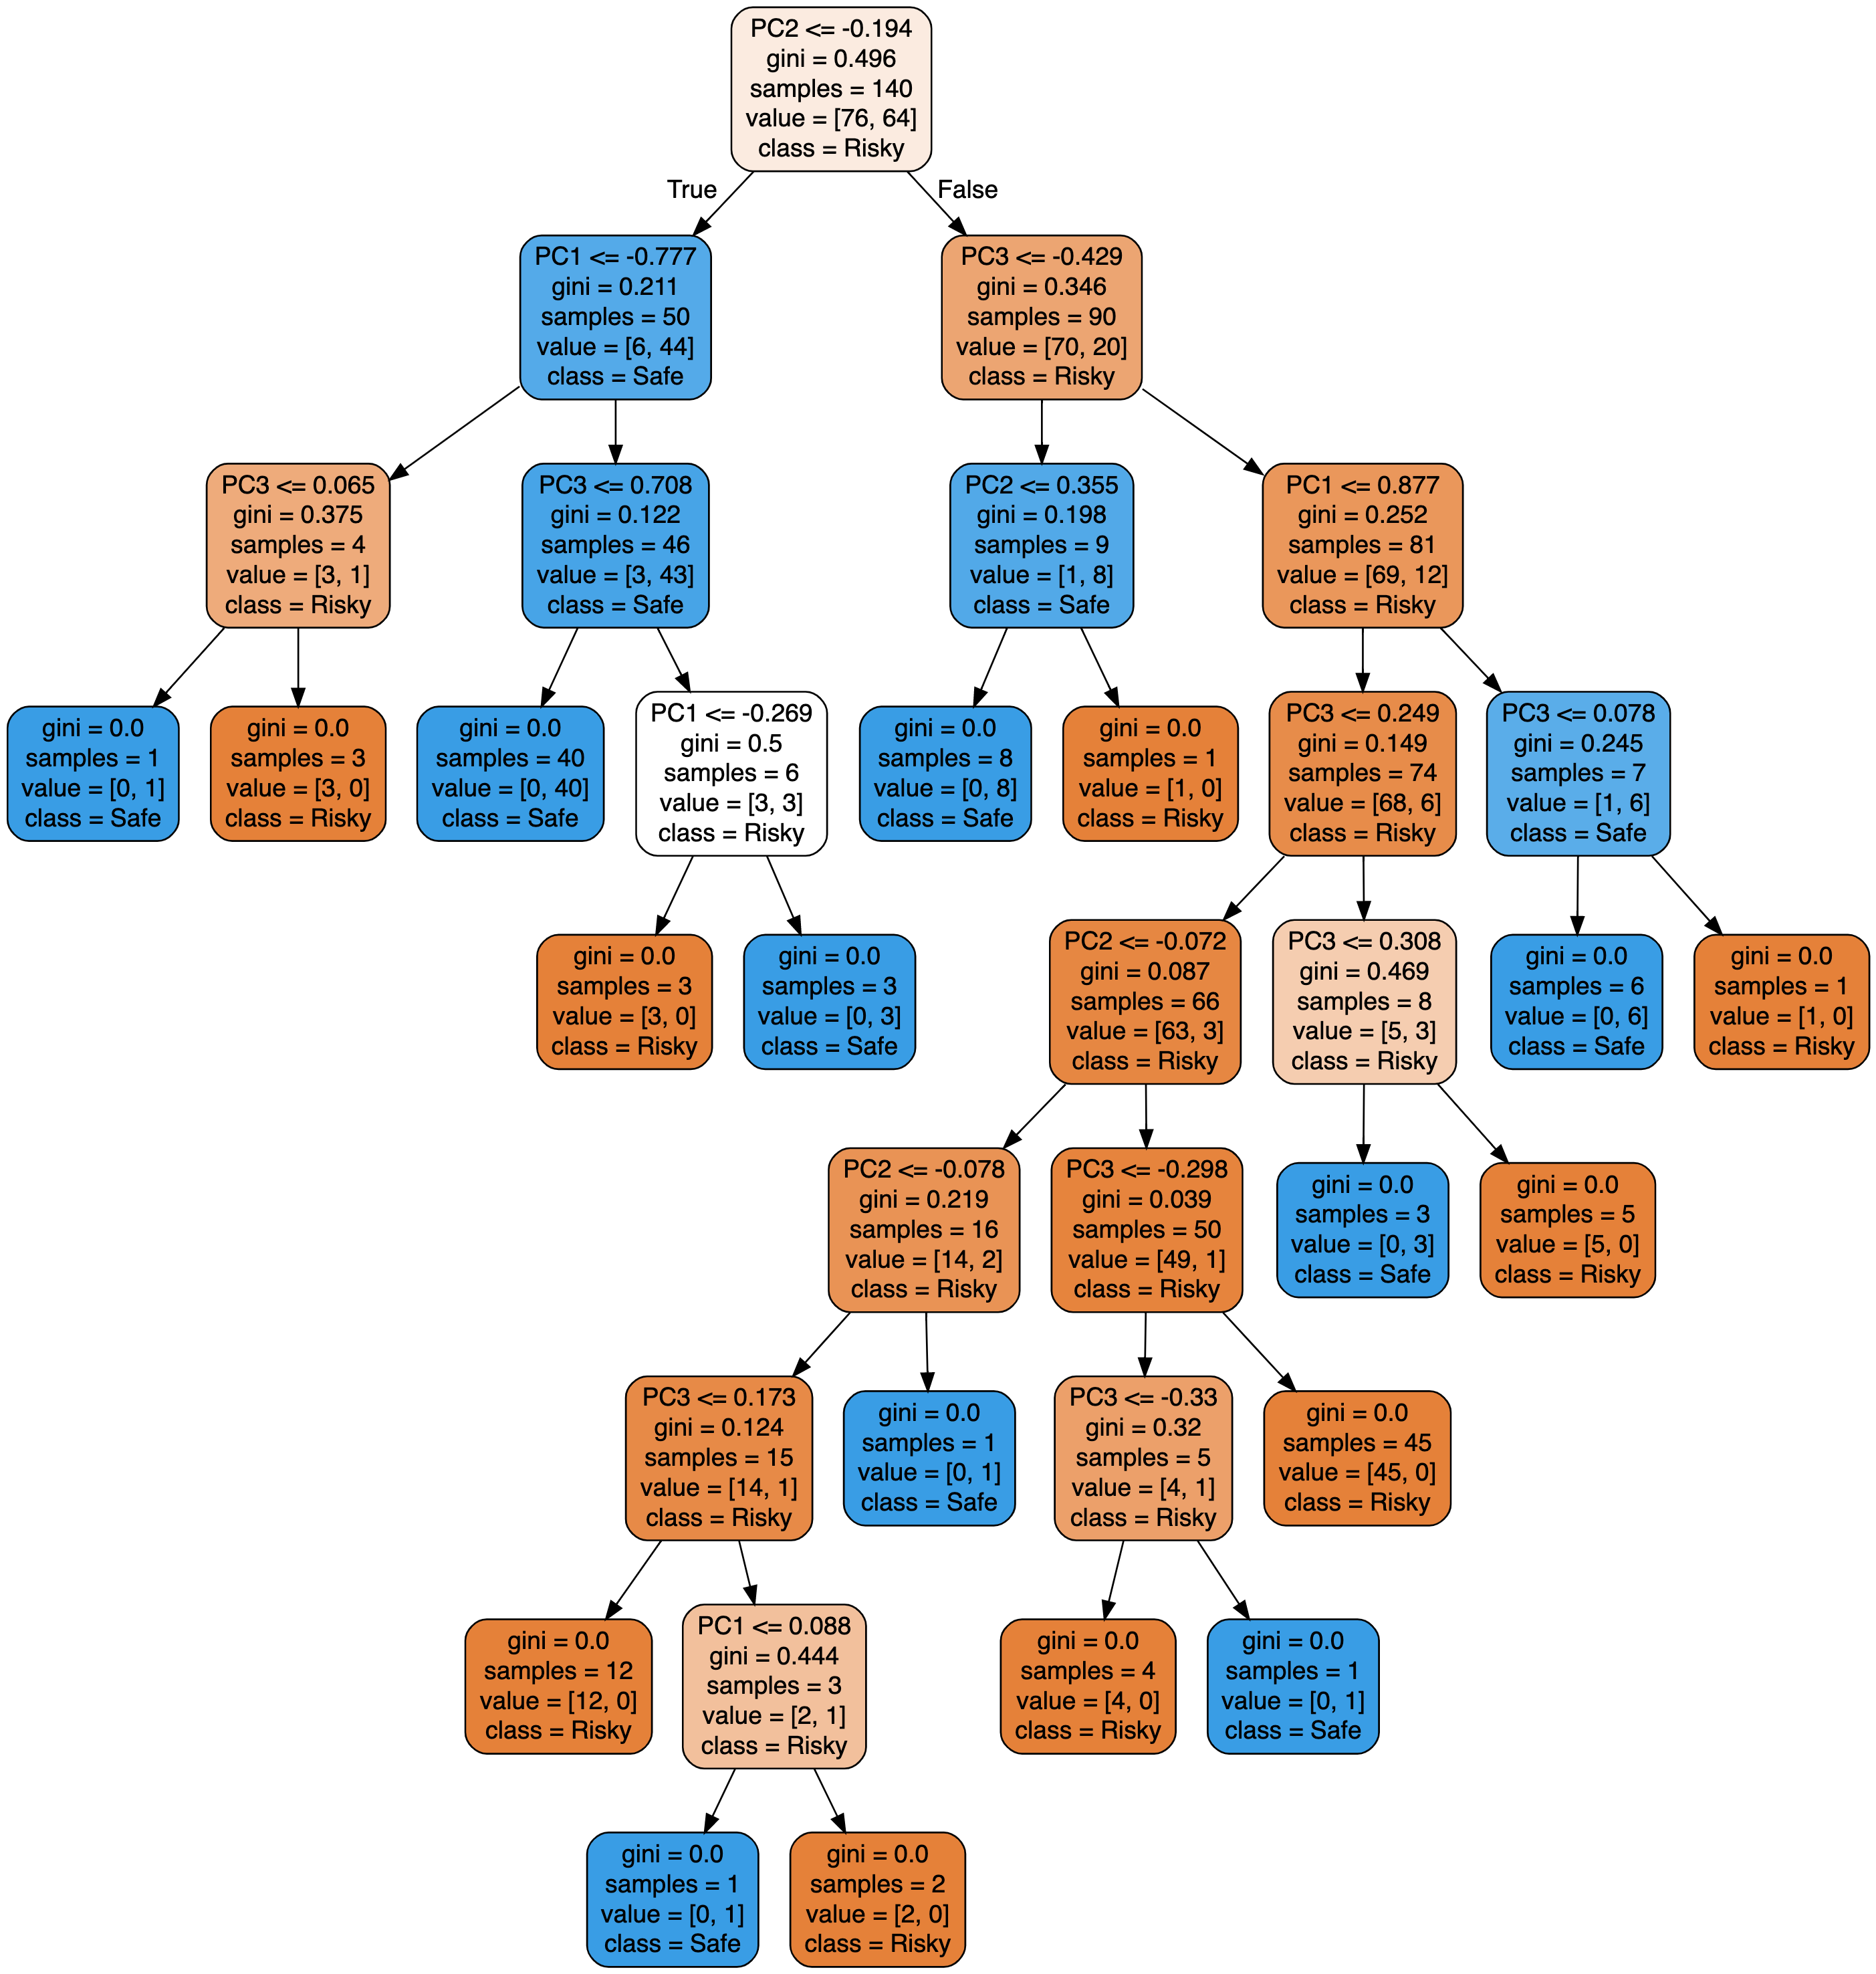

In [167]:
Image("riskiness_DT.png")

### Summary for Predicting Riskiness

Best accuracies of each algorithm:

**Logistic Regression:** 0.791

**k-Nearest Neighbors:** 0.803

**Decision Trees:** 0.752

K-Nearest Neighbors performed the best out of all the algorithms in predicting riskiness.

## Predicting Make of a Car

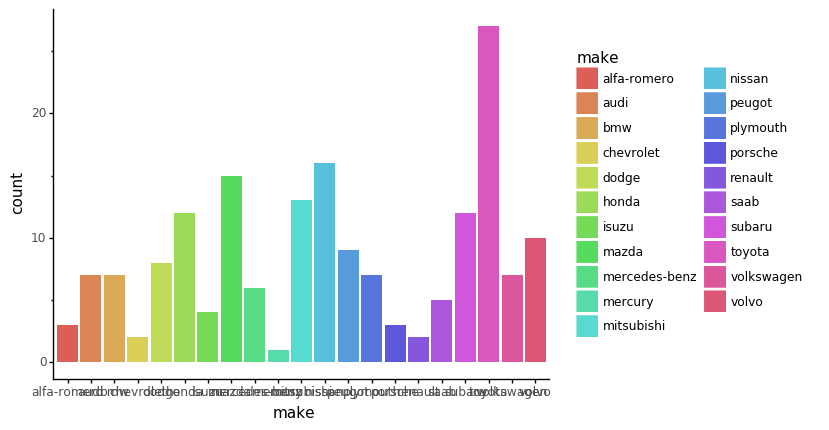

<ggplot: (279492857)>

In [32]:
make = ggplot(filtered_cars,aes(x='make',fill='make'))+geom_bar()+theme_classic()
file_name = "make.png"
ggsave(plot = make, filename = file_name, height = 10, width = 20)
make

In [48]:
num_cols = [0,1,9,10,11,12,13,16,18,19,20,21,22,23,24,25]
nums = filtered_cars.iloc[:,num_cols]

### Logistic Regression

In [34]:
accuracy = 0
for i in range(num_iter):
    X_train, X_test, y_train, y_test = train_test_split(nums, filtered_cars['make'], test_size=0.2)
    logmodel = LogisticRegression()
    logmodel.fit(X_train, y_train)
    accuracy += cross_val_score(logmodel, nums, filtered_cars['make'], cv=5).mean()
print("Logistic Regression (using all values) Accuracy: ", accuracy/num_iter)

Logistic Regression (using all values) Accuracy:  0.2622222222222223


In [35]:
accuracy = 0
for i in range(num_iter):
    X_train, X_test, y_train, y_test = train_test_split(PCN, filtered_cars['make'], test_size=0.2)
    logmodel = LogisticRegression()
    logmodel.fit(X_train, y_train)
    accuracy += cross_val_score(logmodel, PCN, filtered_cars['make'], cv=5).mean()
print("Logistic Regression (using PCA) Accuracy: ", accuracy/num_iter)

Logistic Regression (using PCA) Accuracy:  0.3753968253968253


### k-Nearest Neighbors

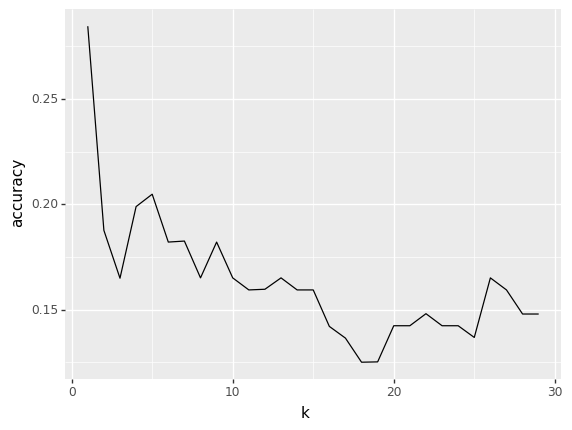

<ggplot: (309735493)>

In [36]:
accuracy = []
k = []
for i in range(1,30):
    neigh=KNeighborsClassifier(n_neighbors=i)
    X_train, X_test, y_train, y_test = train_test_split(nums, filtered_cars['make'], test_size=0.2)
    neigh.fit(X_train,y_train)
    k.append(i)
    accuracy.append(cross_val_score(neigh, nums, filtered_cars['make'], cv=5).mean())
df = pd.DataFrame({'k':k,'accuracy':accuracy})
ggplot(df,aes(x='k',y='accuracy'))+geom_line()

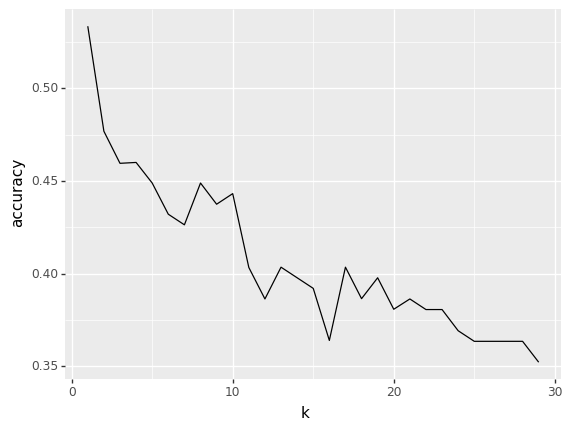

<ggplot: (309742745)>

In [37]:
accuracy = []
k = []
for i in range(1,30):
    neigh=KNeighborsClassifier(n_neighbors=i)
    X_train, X_test, y_train, y_test = train_test_split(PCN, filtered_cars['make'], test_size=0.2)
    neigh.fit(X_train,y_train)
    k.append(i)
    accuracy.append(cross_val_score(neigh, PCN, filtered_cars['make'], cv=5).mean())
df = pd.DataFrame({'k':k,'accuracy':accuracy})
make = ggplot(df,aes(x='k',y='accuracy'))+geom_line()
file_name = "make_kNN.png"
ggsave(plot = make, filename = file_name)
make

In [39]:
accuracy = 0
for i in range(num_iter):
    neigh=KNeighborsClassifier(n_neighbors=1)
    X_train, X_test, y_train, y_test = train_test_split(nums, filtered_cars['make'], test_size=0.2)
    neigh.fit(X_train,y_train)
    accuracy += cross_val_score(neigh, nums, filtered_cars['make'], cv=5).mean()
print("k-Nearest Neighbors (using all values) Accuracy: ", accuracy/num_iter)

k-Nearest Neighbors (using all values) Accuracy:  0.28444444444444444


In [38]:
accuracy = 0
for i in range(num_iter):
    neigh=KNeighborsClassifier(n_neighbors=1)
    X_train, X_test, y_train, y_test = train_test_split(PCN, filtered_cars['make'], test_size=0.2)
    neigh.fit(X_train,y_train)
    accuracy += cross_val_score(neigh, PCN, filtered_cars['make'], cv=5).mean()
print("k-Nearest Neighbors (using PCA) Accuracy: ", accuracy/num_iter)

k-Nearest Neighbors (using PCA) Accuracy:  0.533492063492063


### Decision Tree

In [51]:
accuracy = 0
for i in range(num_iter):
    X_train,X_test,Y_train,Y_test = train_test_split(nums, filtered_cars['make'],test_size=0.2)
    clf = DecisionTreeClassifier()
    clf.fit(X_train,Y_train)
    accuracy += cross_val_score(clf, nums, filtered_cars['make'], cv=5).mean()
print("Logistic Regression (using all values) Accuracy: ", accuracy/num_iter)

Logistic Regression (using all values) Accuracy:  0.689520634920635


In [52]:
export_graphviz(
    clf,
    out_file = "make_DT.dot",
    feature_names = nums.columns,
    class_names = ["alfa-romero","audi","bmw","chevrolet","dodge","honda","isuzu","mazda","mercedes-benz","mercury","mitsubishi","nissan","peugot","plymouth","porsche","renault","saab","subaru","toyota","volkswagen","volvo"],
    filled = True,
    rounded = True
)

In [41]:
accuracy = 0
for i in range(num_iter):
    X_train,X_test,Y_train,Y_test = train_test_split(PCN, filtered_cars['make'],test_size=0.2)
    clf = DecisionTreeClassifier()
    clf.fit(X_train,Y_train)
    accuracy += cross_val_score(clf, PCN, filtered_cars['make'], cv=5).mean()
print("Logistic Regression (using PCA) Accuracy: ", accuracy/num_iter)

Logistic Regression (using PCA) Accuracy:  0.518647619047619


In [53]:
Image("make_DT.png")

### Summary for Predicting Make

Best accuracies of each algorithm:

**Logistic Regression:** 0.375

**k-Nearest Neighbors:** 0.533

**Decision Trees:** 0.692

Decision Trees performed the best out of all the algorithms in predicting make.